### data preprocessing FOR character-predictions.csv

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [672]:
# Importing the dataset
dataset_death = pd.read_csv('character-predictions.csv')

([<matplotlib.patches.Wedge at 0x1a20f217f0>,
 [Text(-0.8600916514117876, -0.8368048465273993, 'alive'),
  Text(0.788417347127472, 0.7670711093167825, 'dead')],
 [Text(-0.5017201299902093, -0.4881361604743162, '74.56%'),
  Text(0.43004582570589384, 0.41840242326369953, '25.44%')])

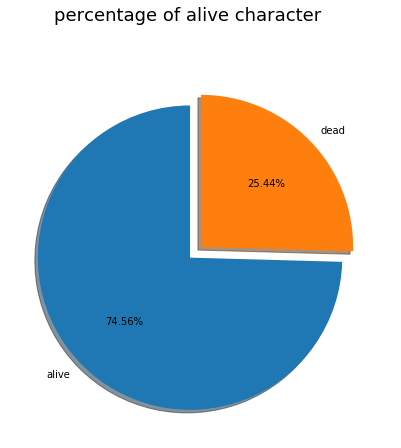

In [673]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
aliveData = pd.value_counts(dataset_death['isAlive'])
f.suptitle("percentage of alive character", fontsize = 18.)
plt.axes(aspect=2)
plt.pie(x=aliveData, labels = ("alive", "dead"), autopct = "%.2f%%", explode=[0.1, 0],shadow=True, labeldistance=1.1, startangle=90, pctdistance=0.6)

#### A total of about 2,000 characters, with 495 deaths. So predicting whether a character is dead is very meaningful.

In [674]:
print("The shape of data is:",dataset_death.shape)
dataset_death.head()

The shape of data is: (1946, 33)


,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [675]:
# remove dupilicated columns
variables_to_remove = ['actual', 'pred', 'alive', 'plod', 'DateoFdeath','dateOfBirth','name',"S.No"]
dataset_death.drop(variables_to_remove, axis = 1, inplace = True)
dataset_death.head()
# ‘age’，'popularity'，'S.No', 

,title,male,culture,mother,father,heir,house,spouse,book1,book2,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,NaN,1,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,Lord of the Crossing,1,Rivermen,NaN,NaN,NaN,House Frey,Perra Royce,1,1,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,Ser,1,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,Queen,0,NaN,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,Greenstone,0,Dornish,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [676]:
#calculate nan values
missing_df = dataset_death.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling percentage']=(dataset_death.shape[0]-missing_df['missing values'])/dataset_death.shape[0]*100
missing_df.sort_values('filling percentage').reset_index(drop = True)

,variable,missing values,filling percentage
0,mother,1925,1.079137
1,isAliveMother,1925,1.079137
2,heir,1923,1.181912
3,isAliveHeir,1923,1.181912
4,isAliveFather,1920,1.336074
5,father,1920,1.336074
6,isAliveSpouse,1670,14.182939
7,spouse,1670,14.182939
8,age,1513,22.250771
9,culture,1269,34.789311


In [677]:
dataset_death['title'] = dataset_death['title'].fillna('no')
dataset_death['isAliveMother'] = dataset_death['isAliveMother'].fillna(-1)
dataset_death['mother'] = dataset_death['mother'].fillna('no')
dataset_death['heir'] = dataset_death['heir'].fillna('no')
dataset_death['isAliveHeir'] = dataset_death['isAliveHeir'].fillna(-1)
dataset_death['father'] = dataset_death['father'].fillna('no')
dataset_death['isAliveFather'] = dataset_death['isAliveFather'].fillna(-1)
dataset_death['spouse'] = dataset_death['spouse'].fillna('no')
dataset_death['isAliveSpouse'] = dataset_death['isAliveSpouse'].fillna(-1)
dataset_death['culture'] = dataset_death['culture'].fillna('no')
dataset_death['house'] = dataset_death['house'].fillna('no')
dataset_death['age'] = dataset_death['age'].fillna(-1)

In [678]:
#calculate nan values
missing_df = dataset_death.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling percentage']=(dataset_death.shape[0]-missing_df['missing values'])/dataset_death.shape[0]*100
missing_df.sort_values('filling percentage').reset_index(drop = True).head()

,variable,missing values,filling percentage
0,title,0,100.0
1,isPopular,0,100.0
2,boolDeadRelations,0,100.0
3,numDeadRelations,0,100.0
4,age,0,100.0


In [679]:
dataset_death.head()

,title,male,culture,mother,father,heir,house,spouse,book1,book2,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,no,1,no,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,no,no,0,0,...,0.0,-1.0,0,0,-1.0,11,1,1,0.605351,0
1,Lord of the Crossing,1,Rivermen,no,no,no,House Frey,Perra Royce,1,1,...,-1.0,1.0,1,1,97.0,1,1,1,0.896321,1
2,Ser,1,no,no,no,no,House Swyft,no,0,0,...,-1.0,-1.0,0,1,-1.0,0,0,0,0.267559,1
3,Queen,0,no,no,no,no,House Arryn,Viserys I Targaryen,0,0,...,-1.0,0.0,1,1,23.0,0,0,0,0.183946,0
4,Greenstone,0,Dornish,no,no,no,House Santagar,Eldon Estermont,0,0,...,-1.0,1.0,1,1,29.0,0,0,0,0.043478,1


### split X and Y

In [680]:
X = dataset_death.iloc[:,:-1]
Y = dataset_death.iloc[:,-1]

In [681]:
# dataset_death.columns.values

In [682]:
# category data

In [683]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelEncoder_X = LabelEncoder()
X.loc[:, "title"] = labelEncoder_X.fit_transform(X.loc[:, "title"])
X.loc[:, "culture"] = labelEncoder_X.fit_transform(X.loc[:, "culture"])
X.loc[:, "mother"] = labelEncoder_X.fit_transform(X.loc[:, "mother"])
X.loc[:, "father"] = labelEncoder_X.fit_transform(X.loc[:, "father"])
X.loc[:, "heir"] = labelEncoder_X.fit_transform(X.loc[:, "heir"])
X.loc[:, "house"] = labelEncoder_X.fit_transform(X.loc[:, "house"])
X.loc[:, "spouse"] = labelEncoder_X.fit_transform(X.loc[:, "spouse"])

In [684]:
X.head()

,title,male,culture,mother,father,heir,house,spouse,book1,book2,...,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity
0,259,1,62,12,8,0,346,254,0,0,...,0.0,0.0,-1.0,0,0,-1.0,11,1,1,0.605351
1,151,1,41,17,20,22,116,184,1,1,...,-1.0,-1.0,1.0,1,1,97.0,1,1,1,0.896321
2,217,1,62,17,20,22,264,254,0,0,...,-1.0,-1.0,-1.0,0,1,-1.0,0,0,0,0.267559
3,194,0,62,17,20,22,23,241,0,0,...,-1.0,-1.0,0.0,1,1,23.0,0,0,0,0.183946
4,68,0,10,17,20,22,237,74,0,0,...,-1.0,-1.0,1.0,1,1,29.0,0,0,0,0.043478


In [685]:
columns=X.columns.values

In [686]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X=sc_X.fit_transform(X)
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [687]:
# training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(X,columns=columns), Y, test_size = 0.25, random_state = 0)

In [688]:
x_train = X_train.copy(deep = True)
# x_train.head()

In [689]:
# type(x_test)

In [690]:
X_train.head()

,title,male,culture,mother,father,heir,house,spouse,book1,book2,...,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity
1343,0.658976,-1.275218,0.632750,0.092989,0.102128,0.095678,-0.901515,0.341267,-0.497429,1.292057,...,-0.110415,-0.105037,-0.39423,-0.406533,-0.924716,0.032447,-0.220993,-0.283744,-0.250614,0.296146
1670,0.658976,-1.275218,0.049557,0.092989,0.102128,0.095678,-1.911368,0.341267,2.010336,1.292057,...,-0.110415,-0.105037,-0.39423,-0.406533,-0.924716,0.031148,-0.220993,-0.283744,-0.250614,-0.328885
1414,0.046234,0.784180,0.632750,0.092989,0.102128,0.095678,-1.491341,0.341267,2.010336,1.292057,...,-0.110415,-0.105037,-0.39423,-0.406533,1.081413,0.031148,-0.220993,-0.283744,-0.250614,-0.287217
610,0.658976,0.784180,0.632750,0.092989,0.102128,0.095678,0.984141,0.341267,-0.497429,-0.773960,...,-0.110415,-0.105037,-0.39423,-0.406533,-0.924716,0.031148,-0.220993,-0.283744,-0.250614,-0.349720
1302,0.046234,0.784180,0.632750,0.092989,0.102128,0.095678,0.733912,0.341267,-0.497429,-0.773960,...,-0.110415,-0.105037,-0.39423,-0.406533,1.081413,0.031148,-0.220993,-0.283744,-0.250614,-0.120542


In [691]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred_dis = []
for n in y_pred:
    if n >= 0.5:
        n = 1
    else:
        n = 0
    y_pred_dis.append(n)
preds_lr = pd.DataFrame(y_pred_dis)
print('Linear Regression Accuracy：(original)\n',accuracy_score(y_test, preds_lr))

Linear Regression Accuracy：(original)
 0.7535934291581109


In [692]:
X = pd.DataFrame(X,columns=columns)
X.head()

,title,male,culture,mother,father,heir,house,spouse,book1,book2,...,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity
0,0.658976,0.784180,0.632750,-4.570828,-8.236641,-15.598388,1.153939,0.341267,-0.497429,-0.773960,...,6.820823,5.273939,-0.394230,-0.406533,-0.924716,0.031148,7.729546,3.524300,3.990205,3.212957
1,-0.916646,0.784180,-0.480617,0.092989,0.102128,0.095678,-0.901515,-1.000359,2.010336,1.292057,...,-0.110415,-0.105037,2.730705,2.459822,1.081413,0.041761,0.501784,3.524300,3.990205,5.025547
2,0.046234,0.784180,0.632750,0.092989,0.102128,0.095678,0.421125,0.341267,-0.497429,-0.773960,...,-0.110415,-0.105037,-0.394230,-0.406533,1.081413,0.031148,-0.220993,-0.283744,-0.250614,1.108686
3,-0.289315,-1.275218,0.632750,0.092989,0.102128,0.095678,-1.732633,0.092108,-0.497429,-0.773960,...,-0.110415,-0.105037,1.168238,2.459822,1.081413,0.033747,-0.220993,-0.283744,-0.250614,0.587827
4,-2.127541,-1.275218,-2.124159,0.092989,0.102128,0.095678,0.179833,-3.108629,-0.497429,-0.773960,...,-0.110415,-0.105037,2.730705,2.459822,1.081413,0.034397,-0.220993,-0.283744,-0.250614,-0.287217


In [693]:
# x_train = np.append(arr = np.ones(shape = (x_train.shape[0],1)),values = x_train,axis = 1)
x_train["B"] = np.ones(shape = (x_train.shape[0],1))
# print(type(x_train))
x_train = pd.DataFrame(x_train, columns=['title', 'male', 'culture', 'mother', 'father', 'heir', 'house',
       'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations',
       'boolDeadRelations', 'isPopular', 'popularity','B'])

In [694]:
# X_train = 
# pd.DataFrame(X_train.values[:,:-1], columns=columns).head()
X_train.head()

,title,male,culture,mother,father,heir,house,spouse,book1,book2,...,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity
1343,0.658976,-1.275218,0.632750,0.092989,0.102128,0.095678,-0.901515,0.341267,-0.497429,1.292057,...,-0.110415,-0.105037,-0.39423,-0.406533,-0.924716,0.032447,-0.220993,-0.283744,-0.250614,0.296146
1670,0.658976,-1.275218,0.049557,0.092989,0.102128,0.095678,-1.911368,0.341267,2.010336,1.292057,...,-0.110415,-0.105037,-0.39423,-0.406533,-0.924716,0.031148,-0.220993,-0.283744,-0.250614,-0.328885
1414,0.046234,0.784180,0.632750,0.092989,0.102128,0.095678,-1.491341,0.341267,2.010336,1.292057,...,-0.110415,-0.105037,-0.39423,-0.406533,1.081413,0.031148,-0.220993,-0.283744,-0.250614,-0.287217
610,0.658976,0.784180,0.632750,0.092989,0.102128,0.095678,0.984141,0.341267,-0.497429,-0.773960,...,-0.110415,-0.105037,-0.39423,-0.406533,-0.924716,0.031148,-0.220993,-0.283744,-0.250614,-0.349720
1302,0.046234,0.784180,0.632750,0.092989,0.102128,0.095678,0.733912,0.341267,-0.497429,-0.773960,...,-0.110415,-0.105037,-0.39423,-0.406533,1.081413,0.031148,-0.220993,-0.283744,-0.250614,-0.120542


In [695]:
# y = pd.DataFrame(y_train)
# y.head()

In [696]:
# x_train.head()

In [622]:
import statsmodels.formula.api as sm
x_opt = x_train[['title', 'male', 'culture', 'mother', 'father', 'heir', 'house','spouse', 'book1', 'book2', 'book3', 'book4', 'book5','isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse','isMarried', 'isNoble', 'age', 'numDeadRelations','boolDeadRelations', 'isPopular', 'popularity','B']]
regressor_OLS = sm.OLS(endog = y_train, exog = x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                isAlive   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     11.60
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           9.35e-41
Time:                        19:44:51   Log-Likelihood:                -723.97
No. Observations:                1459   AIC:                             1498.
Df Residuals:                    1434   BIC:                             1630.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
title                -0.0096      0.014     -0.679      0.497      -0.037       0.018
male                 -0.0376      0.011     -3.407      0.001      -0.059      -0.016
culture              -0.0169      0.011     -1.513      0.130      -0.039       0.005
mother                0.0076      0.022      0.341      0.733      -0.036       0.051
father                0.0008      0.031      0.025      0.980      -0.059       0.061
heir                  0.0195      0.026      0.746      0.456      -0.032       0.071
house                 0.0025      0.011      0.231      0.817      -0.019       0.024
spouse                0.0327      0.019      1.710      0.087      -0.005       0.070
book1                -0.0389      0.012     -3.191      0.001      -0.063      -0.015
book2                -0.0022      0.013     -0.166      0.868      -0.028       0.023
book3                -0.0238      0.013     -1.863      0.063      -0.049       0.001
book4                 0.1238      0.012     10.407      0.000       0.100       0.147
book5                 0.0049      0.012      0.407      0.684      -0.019       0.028
isAliveMother        -0.0206      0.030     -0.679      0.497      -0.080       0.039
isAliveFather        -0.0095      0.025     -0.379      0.705      -0.059       0.040
isAliveHeir           0.0354      0.029      1.235      0.217      -0.021       0.092
isAliveSpouse         0.0676      0.045      1.501      0.134      -0.021       0.156
isMarried            -0.0356      0.050     -0.712      0.476      -0.134       0.062
isNoble              -0.0121      0.015     -0.819      0.413      -0.041       0.017
age                   0.0194      0.009      2.111      0.035       0.001       0.037
numDeadRelations      0.0068      0.019      0.359      0.720      -0.031       0.044
boolDeadRelations    -0.0514      0.018     -2.916      0.004      -0.086      -0.017
isPopular             0.0252      0.021      1.186      0.236      -0.016       0.067
popularity           -0.0709      0.026     -2.768      0.006      -0.121      -0.021
B                     0.7490      0.011     71.202      0.000       0.728       0.770
==============================================================================
Omnibus:                      173.973   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.643
Skew:                          -0.959   Prob(JB):                     8.25e-51
Kurtosis:                       2.661   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [623]:
# father
x_opt = x_train[['title', 'male', 'culture', 'mother', 'heir', 'house','spouse', 'book1', 'book2', 'book3', 'book4', 'book5','isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse','isMarried', 'isNoble', 'age', 'numDeadRelations','boolDeadRelations', 'isPopular', 'popularity','B']]
regressor_OLS = sm.OLS(endog = y_train, exog = x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                isAlive   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     12.11
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           2.65e-41
Time:                        19:44:54   Log-Likelihood:                -723.97
No. Observations:                1459   AIC:                             1496.
Df Residuals:                    1435   BIC:                             1623.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
title                -0.0096      0.014     -0.680      0.497      -0.037       0.018
male                 -0.0376      0.011     -3.408      0.001      -0.059      -0.016
culture              -0.0169      0.011     -1.513      0.130      -0.039       0.005
mother                0.0077      0.022      0.347      0.729      -0.036       0.051
heir                  0.0198      0.023      0.844      0.399      -0.026       0.066
house                 0.0025      0.011      0.231      0.817      -0.019       0.024
spouse                0.0327      0.019      1.711      0.087      -0.005       0.070
book1                -0.0389      0.012     -3.195      0.001      -0.063      -0.015
book2                -0.0022      0.013     -0.167      0.867      -0.027       0.023
book3                -0.0238      0.013     -1.864      0.063      -0.049       0.001
book4                 0.1238      0.012     10.410      0.000       0.100       0.147
book5                 0.0049      0.012      0.408      0.684      -0.019       0.028
isAliveMother        -0.0209      0.028     -0.747      0.455      -0.076       0.034
isAliveFather        -0.0099      0.020     -0.501      0.616      -0.049       0.029
isAliveHeir           0.0357      0.025      1.409      0.159      -0.014       0.085
isAliveSpouse         0.0676      0.045      1.501      0.133      -0.021       0.156
isMarried            -0.0356      0.050     -0.713      0.476      -0.134       0.062
isNoble              -0.0121      0.015     -0.820      0.413      -0.041       0.017
age                   0.0194      0.009      2.112      0.035       0.001       0.037
numDeadRelations      0.0069      0.019      0.361      0.718      -0.030       0.044
boolDeadRelations    -0.0514      0.018     -2.921      0.004      -0.086      -0.017
isPopular             0.0252      0.021      1.186      0.236      -0.016       0.067
popularity           -0.0709      0.026     -2.771      0.006      -0.121      -0.021
B                     0.7490      0.011     71.241      0.000       0.728       0.770
==============================================================================
Omnibus:                      173.979   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.650
Skew:                          -0.959   Prob(JB):                     8.22e-51
Kurtosis:                       2.661   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [624]:
# book2
x_opt = x_train[['title', 'male', 'culture', 'mother', 'heir', 'house','spouse', 'book1', 'book3', 'book4', 'book5','isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse','isMarried', 'isNoble', 'age', 'numDeadRelations','boolDeadRelations', 'isPopular', 'popularity','B']]
regressor_OLS = sm.OLS(endog = y_train, exog = x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                isAlive   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     12.67
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           7.42e-42
Time:                        19:44:54   Log-Likelihood:                -723.98
No. Observations:                1459   AIC:                             1494.
Df Residuals:                    1436   BIC:                             1616.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
title                -0.0097      0.014     -0.693      0.488      -0.037       0.018
male                 -0.0377      0.011     -3.419      0.001      -0.059      -0.016
culture              -0.0169      0.011     -1.520      0.129      -0.039       0.005
mother                0.0077      0.022      0.348      0.728      -0.036       0.051
heir                  0.0199      0.023      0.847      0.397      -0.026       0.066
house                 0.0027      0.011      0.246      0.806      -0.019       0.024
spouse                0.0326      0.019      1.709      0.088      -0.005       0.070
book1                -0.0395      0.012     -3.389      0.001      -0.062      -0.017
book3                -0.0245      0.012     -2.026      0.043      -0.048      -0.001
book4                 0.1238      0.012     10.422      0.000       0.101       0.147
book5                 0.0048      0.012      0.399      0.690      -0.019       0.028
isAliveMother        -0.0208      0.028     -0.744      0.457      -0.076       0.034
isAliveFather        -0.0099      0.020     -0.502      0.616      -0.049       0.029
isAliveHeir           0.0359      0.025      1.417      0.157      -0.014       0.086
isAliveSpouse         0.0677      0.045      1.504      0.133      -0.021       0.156
isMarried            -0.0359      0.050     -0.719      0.473      -0.134       0.062
isNoble              -0.0121      0.015     -0.820      0.412      -0.041       0.017
age                   0.0195      0.009      2.120      0.034       0.001       0.037
numDeadRelations      0.0069      0.019      0.365      0.715      -0.030       0.044
boolDeadRelations    -0.0513      0.018     -2.918      0.004      -0.086      -0.017
isPopular             0.0255      0.021      1.206      0.228      -0.016       0.067
popularity           -0.0715      0.025     -2.825      0.005      -0.121      -0.022
B                     0.7491      0.011     71.289      0.000       0.728       0.770
==============================================================================
Omnibus:                      173.953   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.673
Skew:                          -0.959   Prob(JB):                     8.13e-51
Kurtosis:                       2.661   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [625]:
# house
x_opt = x_train[['title', 'male', 'culture', 'mother', 'heir','spouse', 'book1', 'book3', 'book4', 'book5','isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse','isMarried', 'isNoble', 'age', 'numDeadRelations','boolDeadRelations', 'isPopular', 'popularity','B']]
regressor_OLS = sm.OLS(endog = y_train, exog = x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                isAlive   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     13.28
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           2.06e-42
Time:                        19:44:54   Log-Likelihood:                -724.01
No. Observations:                1459   AIC:                             1492.
Df Residuals:                    1437   BIC:                             1608.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
title                -0.0100      0.014     -0.718      0.473      -0.038       0.017
male                 -0.0378      0.011     -3.428      0.001      -0.059      -0.016
culture              -0.0173      0.011     -1.568      0.117      -0.039       0.004
mother                0.0076      0.022      0.346      0.729      -0.036       0.051
heir                  0.0199      0.023      0.847      0.397      -0.026       0.066
spouse                0.0325      0.019      1.702      0.089      -0.005       0.070
book1                -0.0393      0.012     -3.383      0.001      -0.062      -0.017
book3                -0.0245      0.012     -2.024      0.043      -0.048      -0.001
book4                 0.1234      0.012     10.475      0.000       0.100       0.147
book5                 0.0048      0.012      0.401      0.688      -0.019       0.028
isAliveMother        -0.0208      0.028     -0.743      0.458      -0.076       0.034
isAliveFather        -0.0097      0.020     -0.494      0.621      -0.048       0.029
isAliveHeir           0.0360      0.025      1.423      0.155      -0.014       0.086
isAliveSpouse         0.0677      0.045      1.504      0.133      -0.021       0.156
isMarried            -0.0361      0.050     -0.723      0.470      -0.134       0.062
isNoble              -0.0125      0.015     -0.851      0.395      -0.041       0.016
age                   0.0194      0.009      2.119      0.034       0.001       0.037
numDeadRelations      0.0073      0.019      0.387      0.699      -0.030       0.044
boolDeadRelations    -0.0518      0.017     -2.962      0.003      -0.086      -0.017
isPopular             0.0255      0.021      1.207      0.228      -0.016       0.067
popularity           -0.0716      0.025     -2.830      0.005      -0.121      -0.022
B                     0.7490      0.011     71.321      0.000       0.728       0.770
==============================================================================
Omnibus:                      173.952   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.686
Skew:                          -0.959   Prob(JB):                     8.07e-51
Kurtosis:                       2.662   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [626]:
#mother
x_opt = x_train[['title', 'male', 'culture', 'heir','spouse', 'book1', 'book3', 'book4', 'book5','isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse','isMarried', 'isNoble', 'age', 'numDeadRelations','boolDeadRelations', 'isPopular', 'popularity','B']]
regressor_OLS = sm.OLS(endog = y_train, exog = x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                isAlive   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     13.94
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           5.74e-43
Time:                        19:44:55   Log-Likelihood:                -724.07
No. Observations:                1459   AIC:                             1490.
Df Residuals:                    1438   BIC:                             1601.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
title                -0.0100      0.014     -0.717      0.473      -0.037       0.017
male                 -0.0377      0.011     -3.425      0.001      -0.059      -0.016
culture              -0.0173      0.011     -1.573      0.116      -0.039       0.004
heir                  0.0169      0.022      0.775      0.439      -0.026       0.060
spouse                0.0325      0.019      1.703      0.089      -0.005       0.070
book1                -0.0394      0.012     -3.386      0.001      -0.062      -0.017
book3                -0.0245      0.012     -2.024      0.043      -0.048      -0.001
book4                 0.1234      0.012     10.478      0.000       0.100       0.147
book5                 0.0048      0.012      0.400      0.690      -0.019       0.028
isAliveMother        -0.0274      0.020     -1.346      0.178      -0.067       0.013
isAliveFather        -0.0094      0.020     -0.479      0.632      -0.048       0.029
isAliveHeir           0.0323      0.023      1.411      0.159      -0.013       0.077
isAliveSpouse         0.0678      0.045      1.506      0.132      -0.020       0.156
isMarried            -0.0362      0.050     -0.725      0.468      -0.134       0.062
isNoble              -0.0125      0.015     -0.852      0.395      -0.041       0.016
age                   0.0194      0.009      2.120      0.034       0.001       0.037
numDeadRelations      0.0075      0.019      0.398      0.691      -0.030       0.045
boolDeadRelations    -0.0520      0.017     -2.973      0.003      -0.086      -0.018
isPopular             0.0253      0.021      1.198      0.231      -0.016       0.067
popularity           -0.0714      0.025     -2.822      0.005      -0.121      -0.022
B                     0.7490      0.010     71.343      0.000       0.728       0.770
==============================================================================
Omnibus:                      174.208   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.952
Skew:                          -0.960   Prob(JB):                     7.07e-51
Kurtosis:                       2.659   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [627]:
# numDeadRelations
x_opt = x_train[['title', 'male', 'culture', 'heir','spouse', 'book1', 'book3', 'book4', 'book5','isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse','isMarried', 'isNoble', 'age','boolDeadRelations', 'isPopular', 'popularity','B']]
regressor_OLS = sm.OLS(endog = y_train, exog = x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                isAlive   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     14.68
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           1.59e-43
Time:                        19:44:55   Log-Likelihood:                -724.15
No. Observations:                1459   AIC:                             1488.
Df Residuals:                    1439   BIC:                             1594.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
title                -0.0101      0.014     -0.721      0.471      -0.038       0.017
male                 -0.0379      0.011     -3.441      0.001      -0.059      -0.016
culture              -0.0172      0.011     -1.558      0.119      -0.039       0.004
heir                  0.0150      0.021      0.706      0.480      -0.027       0.057
spouse                0.0326      0.019      1.714      0.087      -0.005       0.070
book1                -0.0394      0.012     -3.392      0.001      -0.062      -0.017
book3                -0.0248      0.012     -2.060      0.040      -0.048      -0.001
book4                 0.1234      0.012     10.476      0.000       0.100       0.146
book5                 0.0047      0.012      0.397      0.691      -0.019       0.028
isAliveMother        -0.0268      0.020     -1.323      0.186      -0.067       0.013
isAliveFather        -0.0094      0.020     -0.480      0.632      -0.048       0.029
isAliveHeir           0.0314      0.023      1.381      0.168      -0.013       0.076
isAliveSpouse         0.0659      0.045      1.473      0.141      -0.022       0.154
isMarried            -0.0341      0.050     -0.687      0.492      -0.131       0.063
isNoble              -0.0125      0.015     -0.852      0.394      -0.041       0.016
age                   0.0192      0.009      2.099      0.036       0.001       0.037
boolDeadRelations    -0.0475      0.013     -3.536      0.000      -0.074      -0.021
isPopular             0.0254      0.021      1.202      0.230      -0.016       0.067
popularity           -0.0698      0.025     -2.795      0.005      -0.119      -0.021
B                     0.7490      0.010     71.369      0.000       0.728       0.770
==============================================================================
Omnibus:                      174.252   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.038
Skew:                          -0.960   Prob(JB):                     6.77e-51
Kurtosis:                       2.660   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [628]:
# book5
x_opt = x_train[['title', 'male', 'culture', 'heir','spouse', 'book1', 'book3', 'book4','isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse','isMarried', 'isNoble', 'age','boolDeadRelations', 'isPopular', 'popularity','B']]
regressor_OLS = sm.OLS(endog = y_train, exog = x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                isAlive   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     15.49
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           4.27e-44
Time:                        19:44:55   Log-Likelihood:                -724.23
No. Observations:                1459   AIC:                             1486.
Df Residuals:                    1440   BIC:                             1587.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
title                -0.0101      0.014     -0.724      0.469      -0.038       0.017
male                 -0.0378      0.011     -3.434      0.001      -0.059      -0.016
culture              -0.0179      0.011     -1.655      0.098      -0.039       0.003
heir                  0.0150      0.021      0.707      0.480      -0.027       0.057
spouse                0.0329      0.019      1.732      0.084      -0.004       0.070
book1                -0.0386      0.011     -3.375      0.001      -0.061      -0.016
book3                -0.0243      0.012     -2.029      0.043      -0.048      -0.001
book4                 0.1244      0.011     10.842      0.000       0.102       0.147
isAliveMother        -0.0270      0.020     -1.330      0.184      -0.067       0.013
isAliveFather        -0.0096      0.020     -0.487      0.627      -0.048       0.029
isAliveHeir           0.0312      0.023      1.371      0.171      -0.013       0.076
isAliveSpouse         0.0670      0.045      1.502      0.133      -0.020       0.155
isMarried            -0.0351      0.050     -0.708      0.479      -0.132       0.062
isNoble              -0.0123      0.015     -0.838      0.402      -0.041       0.017
age                   0.0193      0.009      2.106      0.035       0.001       0.037
boolDeadRelations    -0.0471      0.013     -3.518      0.000      -0.073      -0.021
isPopular             0.0248      0.021      1.178      0.239      -0.017       0.066
popularity           -0.0687      0.025     -2.770      0.006      -0.117      -0.020
B                     0.7490      0.010     71.389      0.000       0.728       0.770
==============================================================================
Omnibus:                      174.403   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.771
Skew:                          -0.959   Prob(JB):                     7.74e-51
Kurtosis:                       2.654   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [629]:
# isAliveFather
x_opt = x_train[['title', 'male', 'culture', 'heir','spouse', 'book1', 'book3', 'book4','isAliveMother', 'isAliveHeir', 'isAliveSpouse','isMarried', 'isNoble', 'age','boolDeadRelations', 'isPopular', 'popularity','B']]
regressor_OLS = sm.OLS(endog = y_train, exog = x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                isAlive   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     16.40
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           1.16e-44
Time:                        19:44:56   Log-Likelihood:                -724.35
No. Observations:                1459   AIC:                             1485.
Df Residuals:                    1441   BIC:                             1580.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
title                -0.0101      0.014     -0.725      0.468      -0.038       0.017
male                 -0.0380      0.011     -3.454      0.001      -0.060      -0.016
culture              -0.0179      0.011     -1.650      0.099      -0.039       0.003
heir                  0.0119      0.020      0.587      0.557      -0.028       0.052
spouse                0.0329      0.019      1.732      0.084      -0.004       0.070
book1                -0.0387      0.011     -3.383      0.001      -0.061      -0.016
book3                -0.0241      0.012     -2.019      0.044      -0.048      -0.001
book4                 0.1246      0.011     10.866      0.000       0.102       0.147
isAliveMother        -0.0324      0.017     -1.918      0.055      -0.066       0.001
isAliveHeir           0.0250      0.019      1.327      0.185      -0.012       0.062
isAliveSpouse         0.0671      0.045      1.505      0.133      -0.020       0.155
isMarried            -0.0352      0.049     -0.711      0.477      -0.132       0.062
isNoble              -0.0121      0.015     -0.826      0.409      -0.041       0.017
age                   0.0193      0.009      2.106      0.035       0.001       0.037
boolDeadRelations    -0.0470      0.013     -3.511      0.000      -0.073      -0.021
isPopular             0.0250      0.021      1.189      0.234      -0.016       0.066
popularity           -0.0689      0.025     -2.777      0.006      -0.118      -0.020
B                     0.7489      0.010     71.406      0.000       0.728       0.770
==============================================================================
Omnibus:                      174.329   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.582
Skew:                          -0.958   Prob(JB):                     8.51e-51
Kurtosis:                       2.653   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [630]:
# isMarried
x_opt = x_train[['title', 'male', 'culture', 'heir','spouse', 'book1', 'book3', 'book4','isAliveMother', 'isAliveHeir', 'isAliveSpouse', 'isNoble', 'age','boolDeadRelations', 'isPopular', 'popularity','B']]
regressor_OLS = sm.OLS(endog = y_train, exog = x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                isAlive   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     17.40
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           3.45e-45
Time:                        19:44:58   Log-Likelihood:                -724.61
No. Observations:                1459   AIC:                             1483.
Df Residuals:                    1442   BIC:                             1573.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
title                -0.0098      0.014     -0.700      0.484      -0.037       0.018
male                 -0.0369      0.011     -3.391      0.001      -0.058      -0.016
culture              -0.0180      0.011     -1.663      0.097      -0.039       0.003
heir                  0.0120      0.020      0.593      0.553      -0.028       0.052
spouse                0.0383      0.017      2.191      0.029       0.004       0.073
book1                -0.0382      0.011     -3.348      0.001      -0.061      -0.016
book3                -0.0244      0.012     -2.039      0.042      -0.048      -0.001
book4                 0.1248      0.011     10.891      0.000       0.102       0.147
isAliveMother        -0.0320      0.017     -1.897      0.058      -0.065       0.001
isAliveHeir           0.0254      0.019      1.350      0.177      -0.011       0.062
isAliveSpouse         0.0380      0.018      2.155      0.031       0.003       0.073
isNoble              -0.0121      0.015     -0.827      0.408      -0.041       0.017
age                   0.0192      0.009      2.096      0.036       0.001       0.037
boolDeadRelations    -0.0476      0.013     -3.563      0.000      -0.074      -0.021
isPopular             0.0259      0.021      1.235      0.217      -0.015       0.067
popularity           -0.0707      0.025     -2.864      0.004      -0.119      -0.022
B                     0.7491      0.010     71.441      0.000       0.728       0.770
==============================================================================
Omnibus:                      174.208   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.067
Skew:                          -0.957   Prob(JB):                     1.10e-50
Kurtosis:                       2.650   Cond. No.                         5.36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [631]:
# heir
x_opt = x_train[['title', 'male', 'culture','spouse', 'book1', 'book3', 'book4','isAliveMother', 'isAliveHeir', 'isAliveSpouse', 'isNoble', 'age','boolDeadRelations', 'isPopular', 'popularity','B']]
regressor_OLS = sm.OLS(endog = y_train, exog = x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                isAlive   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     18.54
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           9.28e-46
Time:                        19:44:59   Log-Likelihood:                -724.79
No. Observations:                1459   AIC:                             1482.
Df Residuals:                    1443   BIC:                             1566.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
title                -0.0097      0.014     -0.698      0.485      -0.037       0.018
male                 -0.0371      0.011     -3.404      0.001      -0.058      -0.016
culture              -0.0180      0.011     -1.663      0.097      -0.039       0.003
spouse                0.0383      0.017      2.193      0.028       0.004       0.073
book1                -0.0383      0.011     -3.353      0.001      -0.061      -0.016
book3                -0.0244      0.012     -2.044      0.041      -0.048      -0.001
book4                 0.1248      0.011     10.889      0.000       0.102       0.147
isAliveMother        -0.0363      0.015     -2.371      0.018      -0.066      -0.006
isAliveHeir           0.0193      0.016      1.224      0.221      -0.012       0.050
isAliveSpouse         0.0379      0.018      2.151      0.032       0.003       0.073
isNoble              -0.0121      0.015     -0.824      0.410      -0.041       0.017
age                   0.0192      0.009      2.098      0.036       0.001       0.037
boolDeadRelations    -0.0479      0.013     -3.588      0.000      -0.074      -0.022
isPopular             0.0250      0.021      1.192      0.233      -0.016       0.066
popularity           -0.0694      0.025     -2.823      0.005      -0.118      -0.021
B                     0.7491      0.010     71.469      0.000       0.729       0.770
==============================================================================
Omnibus:                      173.607   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.156
Skew:                          -0.955   Prob(JB):                     1.74e-50
Kurtosis:                       2.651   Cond. No.                         5.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [632]:
# title
x_opt = x_train[['male', 'culture','spouse', 'book1', 'book3', 'book4','isAliveMother', 'isAliveHeir', 'isAliveSpouse', 'isNoble', 'age','boolDeadRelations', 'isPopular', 'popularity','B']]
regressor_OLS = sm.OLS(endog = y_train, exog = x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                isAlive   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     19.84
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           2.57e-46
Time:                        19:45:00   Log-Likelihood:                -725.03
No. Observations:                1459   AIC:                             1480.
Df Residuals:                    1444   BIC:                             1559.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
male                 -0.0375      0.011     -3.449      0.001      -0.059      -0.016
culture              -0.0189      0.011     -1.756      0.079      -0.040       0.002
spouse                0.0386      0.017      2.210      0.027       0.004       0.073
book1                -0.0382      0.011     -3.343      0.001      -0.061      -0.016
book3                -0.0244      0.012     -2.045      0.041      -0.048      -0.001
book4                 0.1247      0.011     10.889      0.000       0.102       0.147
isAliveMother        -0.0362      0.015     -2.368      0.018      -0.066      -0.006
isAliveHeir           0.0193      0.016      1.225      0.221      -0.012       0.050
isAliveSpouse         0.0381      0.018      2.159      0.031       0.003       0.073
isNoble              -0.0054      0.011     -0.486      0.627      -0.027       0.016
age                   0.0192      0.009      2.104      0.036       0.001       0.037
boolDeadRelations    -0.0480      0.013     -3.594      0.000      -0.074      -0.022
isPopular             0.0244      0.021      1.164      0.245      -0.017       0.065
popularity           -0.0688      0.025     -2.801      0.005      -0.117      -0.021
B                     0.7491      0.010     71.481      0.000       0.729       0.770
==============================================================================
Omnibus:                      173.546   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.019
Skew:                          -0.955   Prob(JB):                     1.86e-50
Kurtosis:                       2.651   Cond. No.                         5.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [633]:
# isNoble
x_opt = x_train[['male', 'culture','spouse', 'book1', 'book3', 'book4','isAliveMother', 'isAliveHeir', 'isAliveSpouse', 'age','boolDeadRelations', 'isPopular', 'popularity','B']]
regressor_OLS = sm.OLS(endog = y_train, exog = x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                isAlive   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     21.36
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           6.09e-47
Time:                        19:45:01   Log-Likelihood:                -725.15
No. Observations:                1459   AIC:                             1478.
Df Residuals:                    1445   BIC:                             1552.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
male                 -0.0385      0.011     -3.599      0.000      -0.059      -0.017
culture              -0.0195      0.011     -1.827      0.068      -0.040       0.001
spouse                0.0385      0.017      2.206      0.028       0.004       0.073
book1                -0.0382      0.011     -3.347      0.001      -0.061      -0.016
book3                -0.0240      0.012     -2.012      0.044      -0.047      -0.001
book4                 0.1244      0.011     10.883      0.000       0.102       0.147
isAliveMother        -0.0357      0.015     -2.339      0.019      -0.066      -0.006
isAliveHeir           0.0200      0.016      1.273      0.203      -0.011       0.051
isAliveSpouse         0.0374      0.018      2.130      0.033       0.003       0.072
age                   0.0191      0.009      2.090      0.037       0.001       0.037
boolDeadRelations    -0.0483      0.013     -3.622      0.000      -0.074      -0.022
isPopular             0.0243      0.021      1.164      0.244      -0.017       0.065
popularity           -0.0696      0.024     -2.843      0.005      -0.118      -0.022
B                     0.7491      0.010     71.498      0.000       0.729       0.770
==============================================================================
Omnibus:                      173.551   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.825
Skew:                          -0.954   Prob(JB):                     2.05e-50
Kurtosis:                       2.649   Cond. No.                         5.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [634]:
# isPopular
x_opt = x_train[['male', 'culture','spouse', 'book1', 'book3', 'book4','isAliveMother', 'isAliveHeir', 'isAliveSpouse', 'age','boolDeadRelations', 'popularity','B']]
regressor_OLS = sm.OLS(endog = y_train, exog = x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                isAlive   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     23.02
Date:                Wed, 17 Apr 2019   Prob (F-statistic):           2.37e-47
Time:                        19:45:02   Log-Likelihood:                -725.84
No. Observations:                1459   AIC:                             1478.
Df Residuals:                    1446   BIC:                             1546.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
male                 -0.0385      0.011     -3.605      0.000      -0.059      -0.018
culture              -0.0198      0.011     -1.855      0.064      -0.041       0.001
spouse                0.0394      0.017      2.260      0.024       0.005       0.074
book1                -0.0387      0.011     -3.393      0.001      -0.061      -0.016
book3                -0.0249      0.012     -2.099      0.036      -0.048      -0.002
book4                 0.1234      0.011     10.824      0.000       0.101       0.146
isAliveMother        -0.0350      0.015     -2.294      0.022      -0.065      -0.005
isAliveHeir           0.0191      0.016      1.216      0.224      -0.012       0.050
isAliveSpouse         0.0362      0.018      2.065      0.039       0.002       0.071
age                   0.0195      0.009      2.138      0.033       0.002       0.037
boolDeadRelations    -0.0481      0.013     -3.608      0.000      -0.074      -0.022
popularity           -0.0480      0.016     -3.013      0.003      -0.079      -0.017
B                     0.7490      0.010     71.482      0.000       0.728       0.770
==============================================================================
Omnibus:                      174.179   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.919
Skew:                          -0.956   Prob(JB):                     1.19e-50
Kurtosis:                       2.649   Cond. No.                         3.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [635]:
# 'male', 'culture','spouse', 'book1', 'book3', 'book4','isAliveMother', 'isAliveHeir', 'isAliveSpouse', 'age','boolDeadRelations', 'popularity','B'

In [774]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=10, max_features=17, max_depth=9, bootstrap=True, oob_score=True)
random_forest.fit(X_train, y_train)
preds_rf = random_forest.predict_proba(X_test)
print('RandomForest Accuracy：(original)\n',accuracy_score(y_test, np.argmax(preds_rf, axis = 1), normalize=True))

RandomForest Accuracy：(original)
 0.8336755646817249


In [698]:
# score=[]
# for i in range (10,40):
#     for j in range(10,20):
#         for k in range(5,10):
#             for l in ["True","False"]:
#                 for h in ["True", "False"]:
#                     random_forest = RandomForestClassifier(n_estimators=i, max_features=j, max_depth=k, bootstrap=l, oob_score=h)
#                     random_forest.fit(X_train,y_train)
#                     preds_rf = random_forest.predict_proba(X_test)
#                     score.append(accuracy_score(y_test, np.argmax(preds_rf, axis = 1), normalize=True))
#                     print(i,j,k,l,h)
#                     print('DecisionTree Accuracy：(original)\n',accuracy_score(y_test, np.argmax(preds_rf, axis = 1), normalize=True))

In [699]:
# pd.DataFrame(score).max()

In [700]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
preds_dt = DT.predict_proba(X_test)
print('DecisionTree Accuracy：(original)\n',accuracy_score(y_test, np.argmax(preds_dt, axis = 1), normalize=True))

DecisionTree Accuracy：(original)
 0.7618069815195072


In [703]:
score=[]
for i in range(5,16):
    for j in range(5,20):
        for k in range(1,20):
            DT=DecisionTreeClassifier(max_features=i, max_depth=j, min_samples_leaf=k)
            DT.fit(X_train,y_train)
            preds_dt = DT.predict_proba(X_test)
            score.append(accuracy_score(y_test, np.argmax(preds_dt, axis = 1), normalize=True))
            print(i,j,k)
            print('DecisionTree Accuracy：(original)\n',accuracy_score(y_test, np.argmax(preds_dt, axis = 1), normalize=True))

5 5 1
DecisionTree Accuracy：(original)
 0.7741273100616016
5 5 2
DecisionTree Accuracy：(original)
 0.7515400410677618
5 5 3
DecisionTree Accuracy：(original)
 0.7741273100616016
5 5 4
DecisionTree Accuracy：(original)
 0.7474332648870636
5 5 5
DecisionTree Accuracy：(original)
 0.7515400410677618
5 5 6
DecisionTree Accuracy：(original)
 0.784394250513347
5 5 7
DecisionTree Accuracy：(original)
 0.7700205338809035
5 5 8
DecisionTree Accuracy：(original)
 0.7782340862422998
5 5 9
DecisionTree Accuracy：(original)
 0.7761806981519507
5 5 10
DecisionTree Accuracy：(original)
 0.7679671457905544
5 5 11
DecisionTree Accuracy：(original)
 0.7967145790554415
5 5 12
DecisionTree Accuracy：(original)
 0.7782340862422998
5 5 13
DecisionTree Accuracy：(original)
 0.7987679671457906
5 5 14
DecisionTree Accuracy：(original)
 0.75564681724846
5 5 15
DecisionTree Accuracy：(original)
 0.7782340862422998
5 5 16
DecisionTree Accuracy：(original)
 0.7638603696098563
5 5 17
DecisionTree Accuracy：(original)
 0.761806981

In [704]:
pd.DataFrame(score).max()

0    0.827515
dtype: float64

In [750]:
DT=DecisionTreeClassifier(max_features=12, max_depth=8, min_samples_leaf=5)
DT.fit(X_train,y_train)
preds_dt = DT.predict_proba(X_test)

In [751]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
preds_knn = knn.predict_proba(X_test)
print('kNN Accuracy：\n',accuracy_score(y_test, np.argmax(preds_knn, axis = 1), normalize=True))

kNN Accuracy：
 0.7248459958932238


In [748]:
score=[]
for i in range(1,10):
    for j in ["uniform","distance"]:
        for k in ["auto", "ball_tree", "kd_tree", "brute"]:
            knn = KNeighborsClassifier(n_neighbors = i, weights=j, algorithm=k)
            knn.fit(X_train,y_train)
            preds_knn = knn.predict_proba(X_test)
            score.append(accuracy_score(y_test, np.argmax(preds_knn, axis = 1), normalize=True))
            print(i,j,k)
            print('DecisionTree Accuracy：(original)\n',accuracy_score(y_test, np.argmax(preds_knn, axis = 1), normalize=True))

1 uniform auto
DecisionTree Accuracy：(original)
 0.784394250513347
1 uniform ball_tree
DecisionTree Accuracy：(original)
 0.784394250513347
1 uniform kd_tree
DecisionTree Accuracy：(original)
 0.784394250513347
1 uniform brute
DecisionTree Accuracy：(original)
 0.7864476386036962
1 distance auto
DecisionTree Accuracy：(original)
 0.784394250513347
1 distance ball_tree
DecisionTree Accuracy：(original)
 0.784394250513347
1 distance kd_tree
DecisionTree Accuracy：(original)
 0.784394250513347
1 distance brute
DecisionTree Accuracy：(original)
 0.7864476386036962
2 uniform auto
DecisionTree Accuracy：(original)
 0.7248459958932238
2 uniform ball_tree
DecisionTree Accuracy：(original)
 0.7248459958932238
2 uniform kd_tree
DecisionTree Accuracy：(original)
 0.7248459958932238
2 uniform brute
DecisionTree Accuracy：(original)
 0.7268993839835729
2 distance auto
DecisionTree Accuracy：(original)
 0.784394250513347
2 distance ball_tree
DecisionTree Accuracy：(original)
 0.784394250513347
2 distance kd_tree

In [749]:
pd.DataFrame(score).max()

0    0.811088
dtype: float64

In [755]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6, weights="distance", algorithm="kd_tree")
knn.fit(X_train, y_train)
preds_knn = knn.predict_proba(X_test)
print('kNN Accuracy：\n',accuracy_score(y_test, np.argmax(preds_knn, axis = 1), normalize=True))

kNN Accuracy：
 0.811088295687885


In [734]:
from sklearn.svm import SVC, LinearSVC
svc = SVC(probability=True)
svc.fit(X_train, y_train)
preds_svc = svc.predict_proba(X_test)
print('SVC Accuracy：\n',accuracy_score(y_test, np.argmax(preds_svc, axis = 1), normalize=True))

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC Accuracy：
 0.7741273100616016


In [735]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
preds_nb = gaussian.predict_proba(X_test)
print('gaussian Accuracy：\n',accuracy_score(y_test, np.argmax(preds_nb, axis = 1), normalize=True))

gaussian Accuracy：
 0.7392197125256673


In [736]:
def make_cm(p, t, axis):
    cm = confusion_matrix(y_test, p)
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    _ = sns.heatmap(cm, square = True, xticklabels = ["Dead", "Alive"], annot = True,
                    annot_kws = {"fontsize": 13}, yticklabels = ["Dead", "Alive"],
                    cbar = True, cbar_kws = {"orientation": "horizontal"}, ax = ax[axis]).set(title=t)

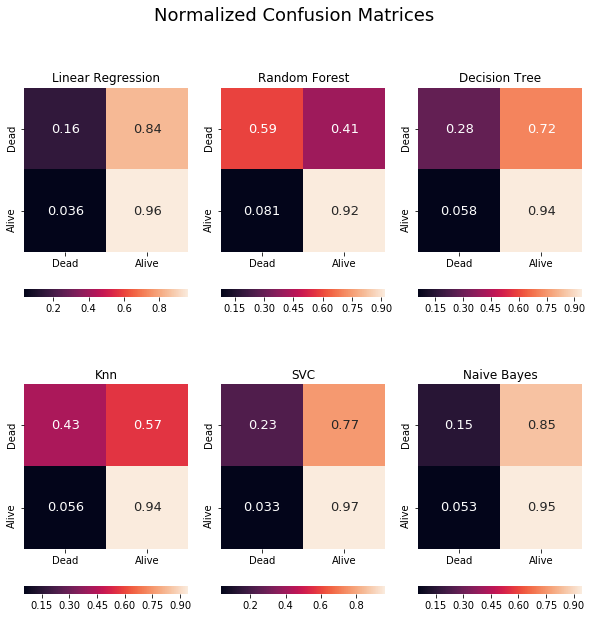

In [775]:
from sklearn.metrics import confusion_matrix
f, ax = plt.subplots(2, 3, figsize = (10, 10))
f.suptitle("Normalized Confusion Matrices", fontsize = 18.)
make_cm(pd.DataFrame(preds_lr), "Linear Regression", (0,0))
make_cm(np.argmax(preds_rf, axis = 1), "Random Forest", (0,1))
make_cm(np.argmax(preds_dt, axis = 1), "Decision Tree", (0,2))
make_cm(np.argmax(preds_knn, axis = 1), "Knn", (1,0))
make_cm(np.argmax(preds_svc, axis = 1), "SVC", (1,1))
make_cm(np.argmax(preds_nb, axis = 1), "Naive Bayes", (1,2))

In [776]:
from sklearn.metrics import roc_curve, auc 

Text(0.5, 1.0, 'ROC Curves')

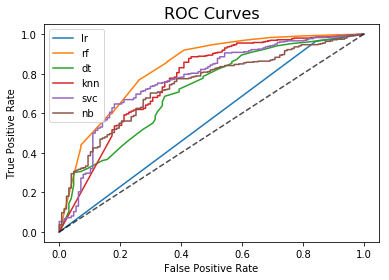

In [777]:
plt.plot(*roc_curve(y_test, preds_lr)[:2])
plt.plot(*roc_curve(y_test, preds_rf[:,1])[:2], c = sns.color_palette()[1])
plt.plot(*roc_curve(y_test, preds_dt[:,1])[:2], c = sns.color_palette()[2])
plt.plot(*roc_curve(y_test, preds_knn[:,1])[:2], c = sns.color_palette()[3])
plt.plot(*roc_curve(y_test, preds_svc[:,1])[:2], c = sns.color_palette()[4])
plt.plot(*roc_curve(y_test, preds_nb[:,1])[:2], c = sns.color_palette()[5])
plt.legend(["lr", "rf","dt",'knn','svc','nb'], loc = "upper left")
plt.plot((0., 1.), (0., 1.), "--k", alpha = .7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves", fontsize = 16.)

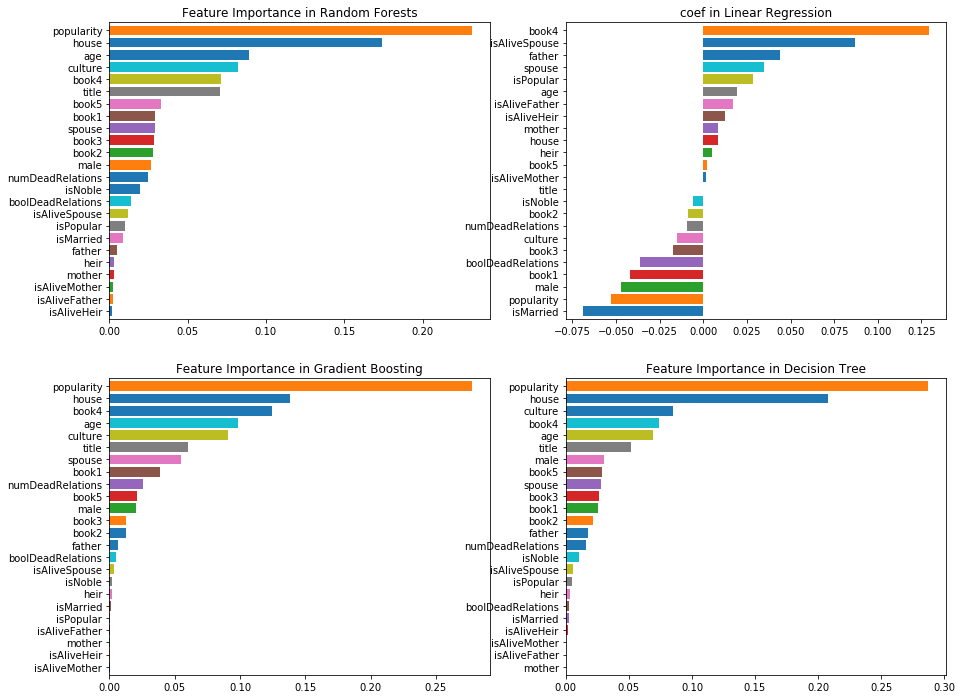

In [759]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model=LinearRegression()
model.fit(X,Y)
pd.Series(model.coef_,columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1])
ax[0,1].set_title('coef in Linear Regression')

model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0])
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model=DecisionTreeClassifier()
model.fit(X,Y)
pd.Series(model.feature_importances_,columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1])
ax[1,1].set_title('Feature Importance in Decision Tree')
plt.show()

In [428]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [307]:
algorithms=['SAMME.R','SAMME']
learning_rates=[0.05,0.1,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i,learning_rate in enumerate(learning_rates):
    print("learning rate is:",learning_rate)
    for i ,algorithm in enumerate(algorithms):
        clf=AdaBoostClassifier(learning_rate=learning_rate,algorithm=algorithm,n_estimators=200)
        clf.fit(X_train,y_train)
        estimators_num=len(clf.estimators_)
        X=range(1,estimators_num+1)
        print("%s:Testing score: %s"%(algorithms[i],cross_val_score(clf,X_test,y_test,cv=8,scoring='accuracy').mean()))

learning rate is: 0.05
SAMME.R:Testing score: 0.8006830601092896
SAMME:Testing score: 0.7822062841530055
learning rate is: 0.1
SAMME.R:Testing score: 0.7966530054644809
SAMME:Testing score: 0.7822062841530054
learning rate is: 0.3
SAMME.R:Testing score: 0.8027663934426229
SAMME:Testing score: 0.7924863387978143
learning rate is: 0.4
SAMME.R:Testing score: 0.8068647540983607
SAMME:Testing score: 0.7924863387978143
learning rate is: 0.5
SAMME.R:Testing score: 0.8007172131147542
SAMME:Testing score: 0.802766393442623
learning rate is: 0.6
SAMME.R:Testing score: 0.7945696721311475
SAMME:Testing score: 0.8007172131147541
learning rate is: 0.7
SAMME.R:Testing score: 0.7904713114754098
SAMME:Testing score: 0.7986680327868853
learning rate is: 0.8
SAMME.R:Testing score: 0.7884562841530055
SAMME:Testing score: 0.802766393442623
learning rate is: 0.9
SAMME.R:Testing score: 0.7822745901639344
SAMME:Testing score: 0.7965846994535519


In [308]:
algorithms=['SAMME.R','SAMME']
learning_rates=[0.05,0.1,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i,learning_rate in enumerate(learning_rates):
    print("learning rate is:",learning_rate)
    for i ,algorithm in enumerate(algorithms):
        clf=AdaBoostClassifier(learning_rate=learning_rate,algorithm=algorithm,n_estimators=100,base_estimator=RandomForestClassifier(n_estimators=50))
        clf.fit(X_train,y_train)
        estimators_num=len(clf.estimators_)
        X=range(1,estimators_num+1)
        print("%s:Testing score: %s"%(algorithms[i],cross_val_score(clf,X_test,y_test,cv=8,scoring='accuracy').mean()))

learning rate is: 0.05
SAMME.R:Testing score: 0.7824112021857923
SAMME:Testing score: 0.7925887978142077
learning rate is: 0.1
SAMME.R:Testing score: 0.7885245901639344
SAMME:Testing score: 0.7905396174863387
learning rate is: 0.3
SAMME.R:Testing score: 0.7823770491803279
SAMME:Testing score: 0.7946379781420765
learning rate is: 0.4
SAMME.R:Testing score: 0.7844262295081967
SAMME:Testing score: 0.7864412568306011
learning rate is: 0.5
SAMME.R:Testing score: 0.7823770491803279
SAMME:Testing score: 0.7967554644808743
learning rate is: 0.6
SAMME.R:Testing score: 0.7844262295081967
SAMME:Testing score: 0.7864071038251366
learning rate is: 0.7
SAMME.R:Testing score: 0.7823428961748633
SAMME:Testing score: 0.8007855191256831
learning rate is: 0.8
SAMME.R:Testing score: 0.7802937158469945
SAMME:Testing score: 0.7926229508196722
learning rate is: 0.9
SAMME.R:Testing score: 0.7843920765027321
SAMME:Testing score: 0.792622950819672


In [429]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
grad.fit(X_train, y_train)
preds_grad = grad.predict_proba(X_test)
print('GradientBoostin Accuracy：\n',accuracy_score(y_test, np.argmax(preds_svc, axis = 1), normalize=True))

GradientBoostin Accuracy：
 0.7741273100616016


In [409]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.7954443886991751


In [461]:
clf=AdaBoostClassifier(learning_rate=0.4,algorithm=algorithm,n_estimators=200, base_estimator=DecisionTreeClassifier(max_features=12, max_depth=11, min_samples_leaf=8))
clf.fit(X_train,y_train)
estimators_num=len(clf.estimators_)
X=range(1,estimators_num+1)
print("Testing score: %s"%cross_val_score(clf,X_test,y_test,cv=8,scoring='accuracy').mean())

Testing score: 0.7659836065573771


In [ ]:
clf.score(X,Y)

In [468]:
score=[]
for i in range(5,16):
    for j in range(5,20):
        for k in range(1,20):
            DT=DecisionTreeClassifier(max_features=i, max_depth=j, min_samples_leaf=k)
            clf=AdaBoostClassifier(learning_rate=0.4,n_estimators=200, base_estimator=DT)
            clf.fit(X_train,y_train)
            score.append(clf.score(X_test,y_test))
            print(i,j,k)
#             print('DecisionTree Accuracy：(original)\n',cross_val_score(clf,X_test,y_test,cv=5,scoring='accuracy').mean())
            print('DecisionTree Accuracy：(original)\n',clf.score(X_test,y_test))

5 5 1
DecisionTree Accuracy：(original)
 0.8090349075975359
5 5 2
DecisionTree Accuracy：(original)
 0.8028747433264887
5 5 3
DecisionTree Accuracy：(original)
 0.7864476386036962
5 5 4
DecisionTree Accuracy：(original)
 0.7946611909650924
5 5 5
DecisionTree Accuracy：(original)
 0.7926078028747433
5 5 6
DecisionTree Accuracy：(original)
 0.7761806981519507
5 5 7
DecisionTree Accuracy：(original)
 0.7864476386036962
5 5 8
DecisionTree Accuracy：(original)
 0.7782340862422998
5 5 9
DecisionTree Accuracy：(original)
 0.7885010266940452
5 5 10
DecisionTree Accuracy：(original)
 0.7885010266940452
5 5 11
DecisionTree Accuracy：(original)
 0.7741273100616016
5 5 12
DecisionTree Accuracy：(original)
 0.7761806981519507
5 5 13
DecisionTree Accuracy：(original)
 0.784394250513347
5 5 14
DecisionTree Accuracy：(original)
 0.784394250513347
5 5 15
DecisionTree Accuracy：(original)
 0.7823408624229979
5 5 16
DecisionTree Accuracy：(original)
 0.7720739219712526
5 5 17
DecisionTree Accuracy：(original)
 0.77618069

In [469]:
pd.DataFrame(score).max()

0    0.831622
dtype: float64